In [1]:
import pandas as pd
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
price=pd.read_csv('tesla_clean.csv')

In [3]:
price=price.set_index('Date')

In [4]:
price

,Close
Date,
2019-05-13,45.402000
2019-05-14,46.462002
2019-05-15,46.389999
2019-05-16,45.666000
2019-05-17,42.206001
...,...
2021-05-06,663.539978
2021-05-07,672.369995
2021-05-10,629.039978


In [5]:
train, test = train_test_split(price, train_size=450)

In [6]:
train

,Close
Date,
2019-05-13,45.402000
2019-05-14,46.462002
2019-05-15,46.389999
2019-05-16,45.666000
2019-05-17,42.206001
...,...
2021-02-17,798.150024
2021-02-18,787.380005
2021-02-19,781.299988


In [7]:
model = pm.auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3661.965, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3688.281, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3690.193, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3690.187, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3690.695, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3693.616, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3693.491, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3684.380, Time=0.80 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3692.150, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3693.213, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3693.281, Time=0.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3689.907, Time=0.90 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3686.034, Time=0.43 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [8]:
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

In [9]:
forecast

,Prediction
Date,
2021-02-24,703.288165
2021-02-25,712.765444
2021-02-26,712.949783
2021-03-01,706.840986
2021-03-02,708.862603
2021-03-03,718.237529
2021-03-04,720.774551
2021-03-05,715.116377
2021-03-08,714.909286


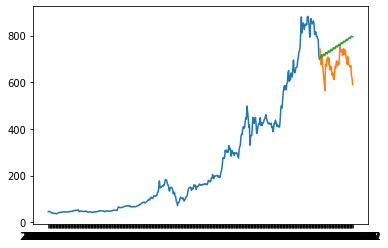

In [10]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

In [11]:
print('Test RMSE: ', mean_squared_error(test, forecast)**0.5)

Test RMSE:  87.33592933134882
